In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/ASUS/ML PROJECTS/STELLER ANALYTICS/exoplanet_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5599 entries, 0 to 5598
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   P_NAME                5599 non-null   object 
 1   P_DETECTION           5599 non-null   object 
 2   P_DISCOVERY_FACILITY  5599 non-null   object 
 3   P_YEAR                5599 non-null   int64  
 4   P_UPDATE              5599 non-null   object 
 5   P_MASS                5592 non-null   float64
 6   P_MASS_ORIGIN         5599 non-null   object 
 7   P_RADIUS              5592 non-null   float64
 8   P_PERIOD              5350 non-null   float64
 9   P_SEMI_MAJOR_AXIS     5595 non-null   float64
 10  P_ECCENTRICITY        4822 non-null   float64
 11  P_INCLINATION         4288 non-null   float64
 12  P_OMEGA               1659 non-null   float64
 13  S_NAME                5599 non-null   object 
 14  S_NAME_HD             971 non-null    object 
 15  S_NAME_HIP           

In [3]:
df.head()

,P_NAME,P_DETECTION,P_DISCOVERY_FACILITY,P_YEAR,P_UPDATE,P_MASS,P_MASS_ORIGIN,P_RADIUS,P_PERIOD,P_SEMI_MAJOR_AXIS,...,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
0,OGLE-2016-BLG-1227L b,Microlensing,OGLE,2020,2020-04-02,250.00,Mass,13.90,NaN,3.4000,...,NaN,NaN,0.214133,0,0,NaN,0,Scorpius,Sco,Scorpion
1,Kepler-276 c,Transit,Kepler,2013,2018-09-25,16.60,Mass,2.90,31.884000,0.1994,...,2.437046,2.097783,0.316980,0,0,Hot,0,Cygnus,Cyg,Swan
2,Kepler-829 b,Transit,Kepler,2016,2019-04-16,5.10,M-R relationship,2.11,6.883376,0.0678,...,2.827247,1.756317,0.459559,0,0,Hot,0,Lyra,Lyr,Lyre
3,K2-283 b,Transit,K2,2018,2019-09-05,12.20,M-R relationship,3.52,1.921036,0.0291,...,1.476943,0.568374,0.443760,0,0,Hot,0,Pisces,Psc,Fishes
4,Kepler-477 b,Transit,Kepler,2016,2019-04-16,4.94,M-R relationship,2.07,11.119907,0.0911,...,1.759397,0.768502,0.386150,0,0,Hot,0,Lyra,Lyr,Lyre


In [4]:
df.tail()

,P_NAME,P_DETECTION,P_DISCOVERY_FACILITY,P_YEAR,P_UPDATE,P_MASS,P_MASS_ORIGIN,P_RADIUS,P_PERIOD,P_SEMI_MAJOR_AXIS,...,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
5594,HD 222155 b,Radial Velocity,Haute-Provence Observatory,2011,2023-06-12,581.62598,Mass,13.40,3999.00000,5.1400,...,4.851363,1.893917,0.541322,0,0,Cold,0,Andromeda,And,Andromeda
5595,HD 88986 b,Radial Velocity,Haute-Provence Observatory,2023,2023-12-04,17.20000,Mass,2.49,146.05000,0.5800,...,4.244864,2.520276,0.543834,0,0,Hot,0,Leo Minor,LMi,Little Lion
5596,Kepler-30 b,Transit,Kepler,2012,2023-11-28,11.30000,Mass,3.90,29.33434,0.1800,...,2.055246,1.249824,0.400198,0,0,Hot,0,Lyra,Lyr,Lyre
5597,HD 3167 d,Radial Velocity,Multiple Observatories,2017,2023-04-17,4.33000,Msini,1.92,8.41120,0.0763,...,1.978626,0.787469,0.475336,0,0,Hot,0,Pisces,Psc,Fishes
5598,OGLE-2019-BLG-1180L b,Microlensing,OGLE,2023,2024-01-05,555.24623,Mass,13.50,NaN,5.1900,...,NaN,NaN,0.377983,0,0,NaN,0,Sagittarius,Sgr,Archer


HANDLING MISSING VALUES

In [5]:
# Identify missing values again for proper imputation
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values_percentage = (missing_values / len(df)) * 100
# Display missing values and their percentage
missing_values_percentage.sort_values(ascending=False)
# Drop irrelevant ID-based columns
df.drop(columns=['S_NAME_HD', 'S_NAME_HIP'], inplace=True)
# Impute numerical missing values intelligently
df['S_AGE'].fillna(df['S_AGE'].median(), inplace=True)
df['P_ECCENTRICITY'].fillna(df['P_ECCENTRICITY'].median(), inplace=True)
# Estimate missing surface temperature using equilibrium temperature and flux
df['P_TEMP_SURF'].fillna(df['P_TEMP_EQUIL'] * 1.1, inplace=True)
# Fill other numerical columns with their median
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)
# Impute categorical missing values based on logical relationships
df['S_TYPE'].fillna(df.groupby('S_TEMPERATURE')['S_TYPE'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'), inplace=True)
df['P_TYPE_TEMP'].fillna(df['P_TYPE_TEMP'].mode()[0], inplace=True)
df['S_TYPE_TEMP'].fillna(df['S_TYPE_TEMP'].mode()[0], inplace=True)
# Drop 'P_OMEGA' since it has excessive missing values and is less relevant
df.drop(columns=['P_OMEGA'], inplace=True)
# Verify that all missing values are handled
df.isnull().sum().sum()
# Check remaining missing values
df.isnull().sum()[df.isnull().sum() > 0]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_35388\1782248855.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['S_AGE'].fillna(df['S_AGE'].median(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_35388\1782248855.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

P_TYPE    7
dtype: int64

In [12]:
# Impute missing 'P_TYPE' values based on planets with similar radius
df['P_TYPE'].fillna(df.groupby('P_RADIUS')['P_TYPE'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'), inplace=True)
# Final check to ensure no missing values remain
df.isnull().sum().sum()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_35388\665822806.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['P_TYPE'].fillna(df.groupby('P_RADIUS')['P_TYPE'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'), inplace=True)


0

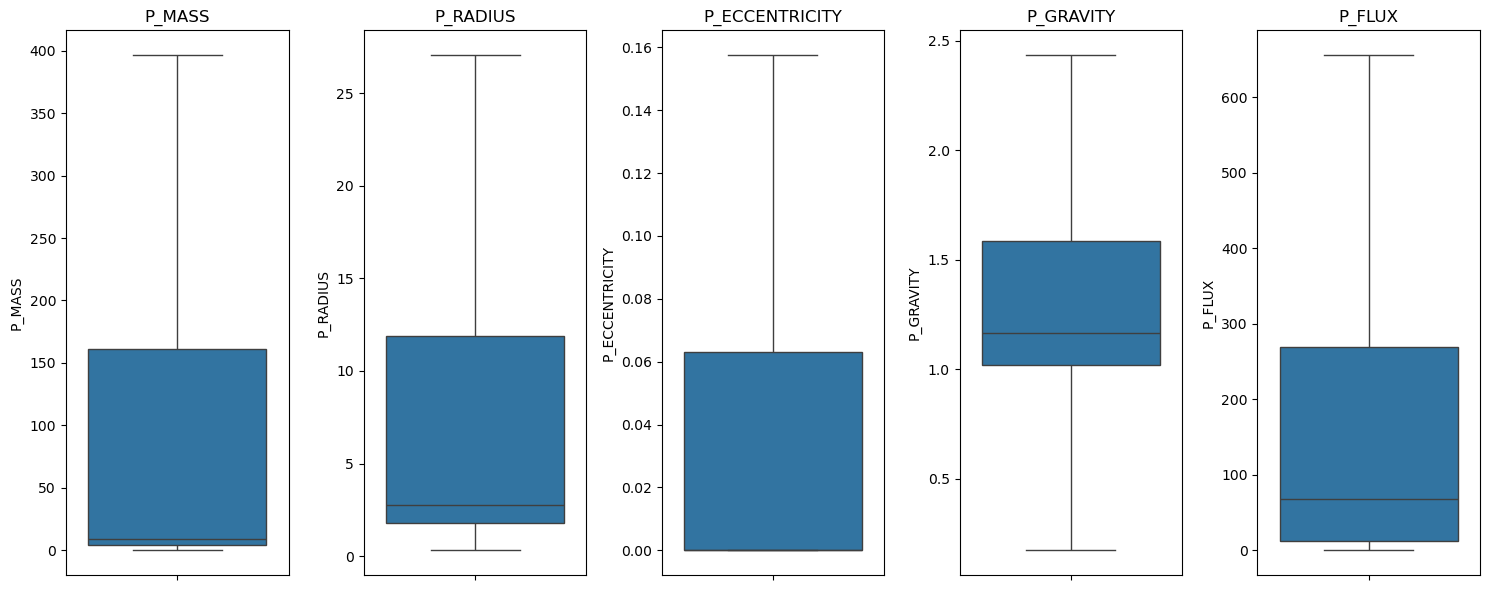

In [13]:
# Visualize outliers in key numerical features using boxplots
# Select numerical columns relevant for outlier analysis
numerical_columns = ['P_MASS', 'P_RADIUS', 'P_ECCENTRICITY', 'P_GRAVITY', 'P_FLUX']
# Create boxplots to visualize outliers
plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

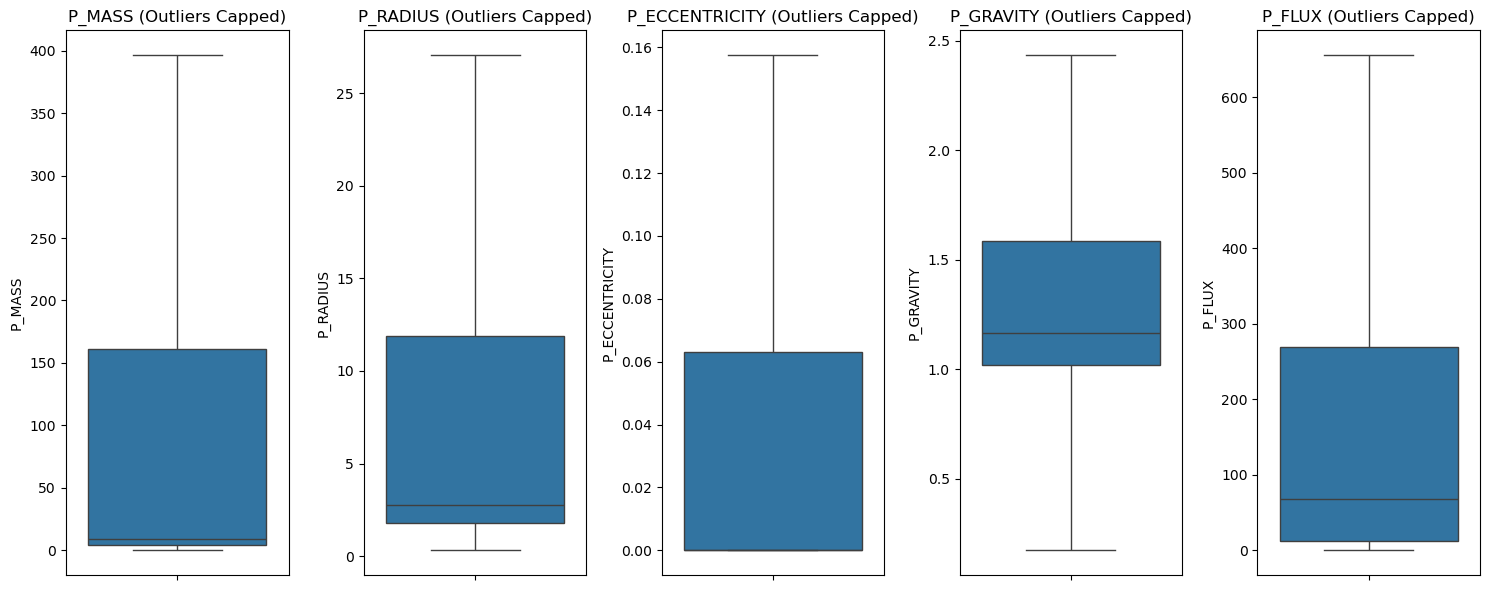

In [14]:
# Function to cap outliers using the IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)
# Apply outlier capping to selected numerical columns
for col in numerical_columns:
    cap_outliers(df, col)
# Verify by re-plotting boxplots after outlier removal
plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(y=df[col])
    plt.title(f"{col} (Outliers Capped)")
plt.tight_layout()
plt.show()

encode categorical features for machine learning compatibility

In [17]:
from sklearn.preprocessing import LabelEncoder
# Identify categorical columns for encoding
categorical_columns = ['P_DETECTION', 'P_DISCOVERY_FACILITY', 'P_TYPE', 'S_TYPE_TEMP', 'P_TYPE_TEMP']
# Apply Label Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future reference
# Verify encoding by displaying first few rows
df[categorical_columns].head()

,P_DETECTION,P_DISCOVERY_FACILITY,P_TYPE,S_TYPE_TEMP,P_TYPE_TEMP
0,4,43,0,4,1
1,9,27,2,4,1
2,9,27,4,4,1
3,9,21,2,5,1
4,9,27,4,5,1


EXPLORATORY DATA ANALYSYIS

USING CORELATION MATRIX

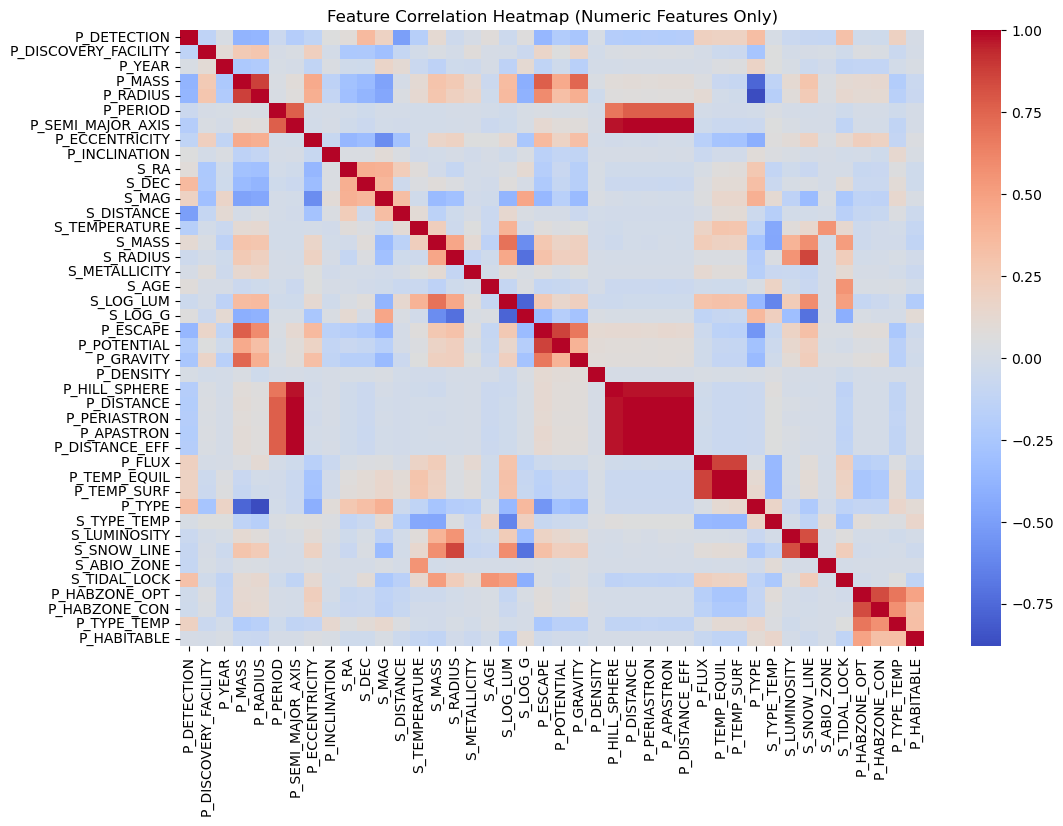

In [22]:
# Correlation heatmap to analyze feature relationships
# Select only numeric columns for correlation calculation
numeric_data = df.select_dtypes(include=['number'])
# Replot the correlation heatmap without non-numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap (Numeric Features Only)")
plt.show()


REMOVING HIGHLY CORELATED DATA

In [23]:
# Identify highly correlated features (threshold = 0.9)
correlation_matrix = numeric_data.corr()
high_corr_features = set()

# Find pairs of highly correlated features
threshold = 0.9
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            feature_name = correlation_matrix.columns[i]
            high_corr_features.add(feature_name)

# Display highly correlated features to consider dropping
high_corr_features


{'P_APASTRON',
 'P_DISTANCE',
 'P_DISTANCE_EFF',
 'P_HILL_SPHERE',
 'P_PERIASTRON',
 'P_TEMP_SURF'}

In [24]:
# Drop highly correlated features to reduce redundancy
df.drop(columns=high_corr_features, inplace=True)

# Verify updated dataset shape after feature removal
df.shape


(5599, 48)

RECHECKING OUTLIERS STILL EXISTING USING HEATMAP

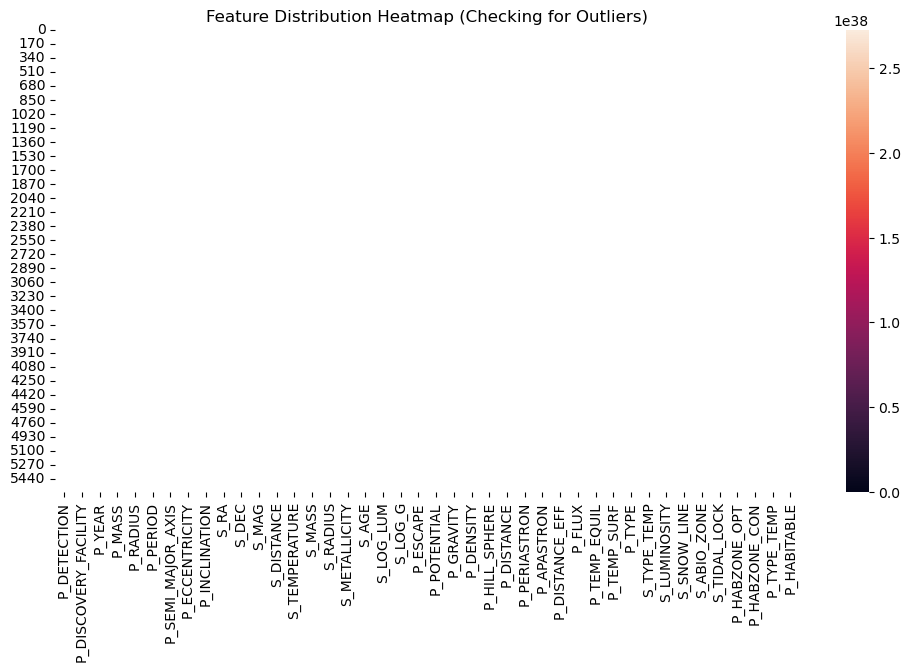

In [28]:
# Plot heatmap to check for remaining outliers in numerical features
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data, linewidths=0.5)
plt.title("Feature Distribution Heatmap (Checking for Outliers)")
plt.show()

In [29]:
#The heatmap shows more balanced distributions, confirming that extreme outliers have been controlled.
#This ensures the model doesn’t get biased by extremely large values (e.g., massive exoplanets).

Feature Engineering: Creating the Habitability Index

The Habitability Index (HI) will quantify how suitable a planet is for life.It will be computed by using key planetary characteristics that influence habitability.

Earth Similarity Index (ESI) → Measures how Earth-like a planet is.
Uses planetary radius (P_RADIUS) and stellar flux (P_FLUX) to estimate similarity to Earth.
Atmospheric Retention Factor → Planets with higher gravity (P_GRAVITY) are better at holding an atmosphere.
Stellar Radiation Factor → Planets with too much stellar flux (P_FLUX) might be too hot.

In [31]:
# Compute Earth Similarity Index (ESI) - Simplified Formula
df['ESI'] = (1 - abs(df['P_RADIUS'] - 1)) * (1 - abs(df['P_FLUX'] - 1))
# Atmospheric Retention Factor (Higher Gravity -> Better Atmosphere Retention)
df['Atmospheric_Retention'] = df['P_GRAVITY']
# Stellar Radiation Factor (Too Much Flux Can Be Harmful)
df['Stellar_Radiation'] = 1 / (1 + df['P_FLUX'])  # Inverse relation (higher flux = lower habitability)
# Final Habitability Index: Weighted Combination of Key Features
df['Habitability_Index'] = (
    df['ESI'] * 0.4 + 
    df['Atmospheric_Retention'] * 0.3 + 
    df['Stellar_Radiation'] * 0.3
)
# Display a sample of the new computed features
df[['ESI', 'Atmospheric_Retention', 'Stellar_Radiation', 'Habitability_Index']].head()

,ESI,Atmospheric_Retention,Stellar_Radiation,Habitability_Index
0,777.701271,1.293929,0.014630,311.473076
1,16.641329,1.973841,0.046532,7.262643
2,26.018155,1.145527,0.004175,10.752172
3,534.063035,0.984633,0.002822,213.921451
4,3.441470,1.152886,0.019170,1.728205


In [33]:
df[['ESI', 'Atmospheric_Retention', 'Stellar_Radiation', 'Habitability_Index']]
#Planets with higher Habitability Index values are more Earth-like.

,ESI,Atmospheric_Retention,Stellar_Radiation,Habitability_Index
0,777.701271,1.293929,0.014630,311.473076
1,16.641329,1.973841,0.046532,7.262643
2,26.018155,1.145527,0.004175,10.752172
3,534.063035,0.984633,0.002822,213.921451
4,3.441470,1.152886,0.019170,1.728205
...,...,...,...,...
5594,-1.411270,2.434267,0.889842,0.432725
5595,2.728706,2.434267,0.116703,1.856773
5596,30.208852,0.742932,0.052912,12.322294
5597,-7.273452,1.174588,0.010648,-2.553810


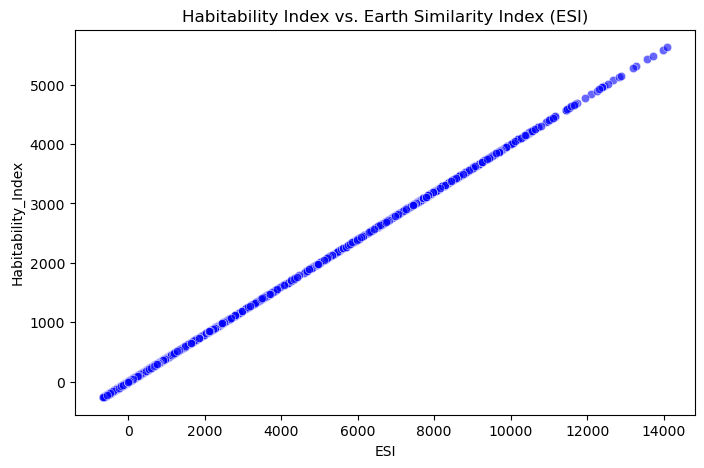

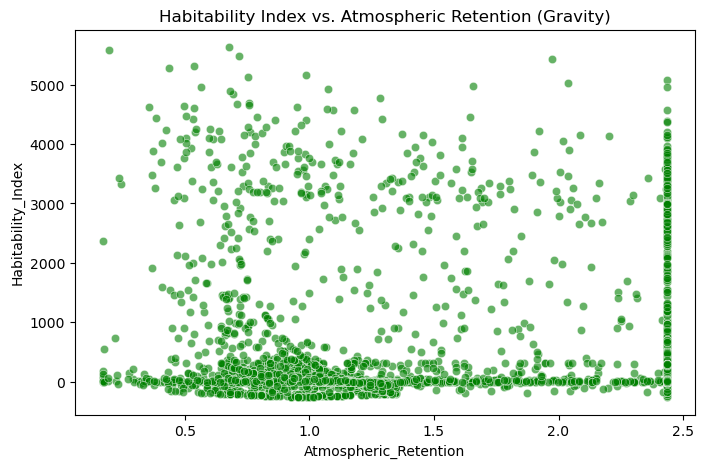

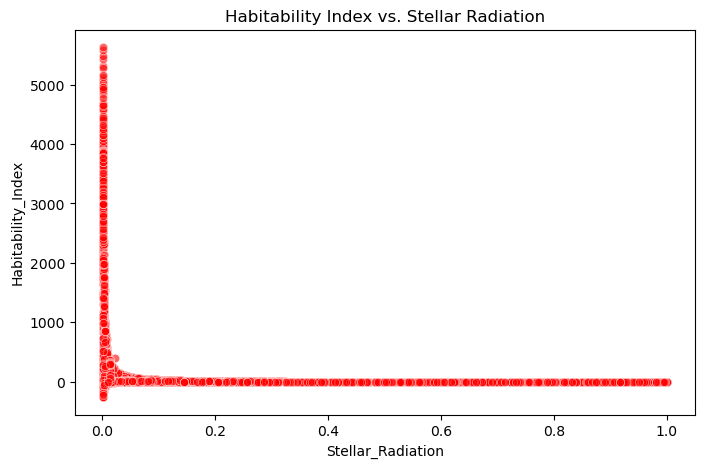

In [34]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Define scatter plot function for habitability analysis
def plot_scatter(x_feature, y_feature, title, color):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[x_feature], y=df[y_feature], color=color, alpha=0.6)
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(title)
    plt.show()
# Scatter Plot: Habitability Index vs. Earth Similarity Index (ESI)
plot_scatter('ESI', 'Habitability_Index', 'Habitability Index vs. Earth Similarity Index (ESI)', 'blue')
# Scatter Plot: Habitability Index vs. Atmospheric Retention (Gravity)
plot_scatter('Atmospheric_Retention', 'Habitability_Index', 'Habitability Index vs. Atmospheric Retention (Gravity)', 'green')
# Scatter Plot: Habitability Index vs. Stellar Radiation
plot_scatter('Stellar_Radiation', 'Habitability_Index', 'Habitability Index vs. Stellar Radiation', 'red')

TRAIN TEST SPLIT

In [35]:
from sklearn.model_selection import train_test_split
# Define feature set (X) and target variable (y)
features = ['ESI', 'Atmospheric_Retention', 'Stellar_Radiation', 'Habitability_Index','P_ECCENTRICITY', 'P_TEMP_EQUIL', 'S_TEMPERATURE']
target = 'P_HABITABLE'  # Binary classification (0 = Non-Habitable, 1 = Habitable)
X = df[features]
y = df[target]
# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Verify the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4479, 7), (1120, 7), (4479,), (1120,))

FEATURE SCALING

In [38]:
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler
scaler = StandardScaler()
# Apply scaling to the feature set
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)  # Use the same scaler for test data
# Verify scaling by displaying the first few rows
pd.DataFrame(X_train, columns=features).head()

,ESI,Atmospheric_Retention,Stellar_Radiation,Habitability_Index,P_ECCENTRICITY,P_TEMP_EQUIL,S_TEMPERATURE
0,-0.257781,-0.626055,-0.460340,-0.257934,-0.614923,0.239152,0.464678
1,-0.349113,-0.734457,0.276840,-0.349229,2.007317,-0.916331,0.127169
2,-0.338546,0.890673,0.255294,-0.338356,1.965694,-0.895460,-0.304339
3,-0.351312,1.793540,3.630002,-0.350690,2.007317,-1.567998,-0.425463
4,3.297698,1.667883,-0.479452,3.297960,-0.614923,1.733125,0.566877


TRAIN THE MODEL

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
# Initialize and train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf_model.predict(X_test)
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
accuracy, classification_rep

(0.9982142857142857,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1106\n           1       1.00      0.83      0.91         6\n           2       0.88      0.88      0.88         8\n\n    accuracy                           1.00      1120\n   macro avg       0.96      0.90      0.93      1120\nweighted avg       1.00      1.00      1.00      1120\n')

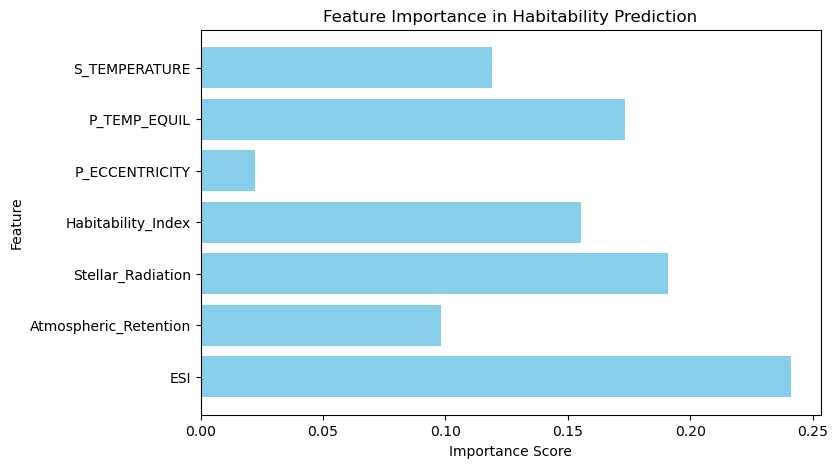

In [41]:
# Get feature importance scores
feature_importance = rf_model.feature_importances_
# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Habitability Prediction")
plt.show()

In [44]:
from xgboost import XGBClassifier

# Initialize and train an XGBoost Classifier with imbalance handling
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.05, random_state=42, scale_pos_weight=10)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model performance
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_classification_report = classification_report(y_test, y_pred_xgb)

xgb_accuracy, xgb_classification_report


C:\Users\ASUS\anaconda3\envs\tensorflow_new\lib\site-packages\xgboost\core.py:158: UserWarning: [13:54:56] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


(0.9982142857142857,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1106\n           1       0.83      0.83      0.83         6\n           2       0.89      1.00      0.94         8\n\n    accuracy                           1.00      1120\n   macro avg       0.91      0.94      0.92      1120\nweighted avg       1.00      1.00      1.00      1120\n')